#### A person makes a doctor appointment, receives all the instructions and then doesn't show up. Who is to blame? Certainly not me or you. So lets find out..

#### Dataset Source: https://www.kaggle.com/joniarroba/noshowappointments 

### Data loading and Cleaning

In [1]:
#packages import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
ncns = pd.read_csv('../NCNS/No-show-Issue-Comma-300k.csv')
print(ncns.head())

   Age Gender AppointmentRegistration        ApointmentData DayOfTheWeek  \
0   19      M    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24      F    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4      F    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5      M    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38      M    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

    Status  Diabetes  Alcoolism  HiperTension  Handcap  Smokes  Scholarship  \
0  Show-Up         0          0             0        0       0            0   
1  Show-Up         0          0             0        0       0            0   
2  Show-Up         0          0             0        0       0            0   
3  Show-Up         0          0             0        0       0            0   
4  Show-Up         0          0             0        0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0             0       

#### Some of the column have typos which is annoying, so lets correct them

In [3]:
#renaming columns
ncns = ncns.rename(columns = 
                   {'ApointmentData' : 'AppointmentData',
                    'Alcoolism' : 'Alcoholism',
                    'HiperTension' : 'HyperTension',
                    'Handcap' : 'Handicap'})
print(ncns.head())

   Age Gender AppointmentRegistration       AppointmentData DayOfTheWeek  \
0   19      M    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24      F    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4      F    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5      M    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38      M    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

    Status  Diabetes  Alcoholism  HyperTension  Handicap  Smokes  Scholarship  \
0  Show-Up         0           0             0         0       0            0   
1  Show-Up         0           0             0         0       0            0   
2  Show-Up         0           0             0         0       0            0   
3  Show-Up         0           0             0         0       0            0   
4  Show-Up         0           0             0         0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0         

#### The names look good now but wait. The AwaitingTime is in negative. I have never heard of a negative time ever. Lets take the absolute values. The appointment related dates too aren't in a proper format but I decided to leave them that way as I won't be analyzing them.

In [4]:
#Changing datetime format
#ncns.AppointmentRegistration = ncns.AppointmentRegistration.apply(np.datetime64)
#ncns.AppointmentData = ncns.AppointmentData.apply(np.datetime64)

#change negative values to positive
ncns.AwaitingTime = ncns.AwaitingTime.apply(abs)

#### Null values always haunt data scientists. Lets check if we have any.

In [5]:
#check for null values
ncns.isnull().any().any()

False

#### Good news, we don't have any. Most of the data seems to be categorical, lets check for any other impossibilities.

In [6]:
#check for other irregularities
print('Awaiting Time: ', sorted (ncns.AwaitingTime.unique()))
print('Age: ', sorted (ncns.Age.unique()))
print('Alcoholism: ', sorted (ncns.Alcoholism.unique()))
print('DayOfWeek: ', sorted (ncns.DayOfTheWeek.unique()))
print('Diabetes: ', sorted (ncns.Diabetes.unique()))
print('Gender: ', sorted (ncns.Gender.unique()))
print('Handicap: ', sorted (ncns.Handicap.unique()))
print('HyperTension: ', sorted (ncns.HyperTension.unique()))
print('TB: ', sorted (ncns.Tuberculosis.unique()))
print('Scholarship: ', sorted (ncns.Scholarship.unique()))
print('SMS: ', sorted (ncns.Sms_Reminder.unique()))

Awaiting Time:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 139, 140, 141, 142, 146, 147, 149, 153, 154, 156, 161, 162, 163, 168, 169, 170, 173, 174, 175, 176, 181, 182, 183, 184, 187, 189, 191, 195, 196, 203, 205, 206, 211, 217, 218, 224, 225, 226, 230, 231, 232, 238, 239, 245, 250, 253, 258, 259, 261, 265, 266, 268, 273, 275, 278, 279, 280, 281, 282, 287, 288, 294, 295, 296, 300, 301, 302, 303, 309, 314, 315, 321, 322, 329, 332, 334, 343, 349, 350, 398]
Age:  [-2, -1, 0, 1, 2, 3,

#### Awaiting time has a range from 1 - 398. Seems possible. 
#### Some people have negative age, must be some error, we need to remove the anomaly. 
#### Alcoholism, Diabetes, Hypertension, TB, Scholarship, all seem to be in binary. Seems good.
#### Days of Week are the correct ones
#### Handicap and SMS seem to be in factors or levels, quite possible!

#### So lets remove the negative ages as the rest of the data seems ok.

In [7]:
ncns = ncns[ncns.Age > 0]

#### Lets check if the datatypes are correct.

In [8]:
ncns.dtypes

Age                         int64
Gender                     object
AppointmentRegistration    object
AppointmentData            object
DayOfTheWeek               object
Status                     object
Diabetes                    int64
Alcoholism                  int64
HyperTension                int64
Handicap                    int64
Smokes                      int64
Scholarship                 int64
Tuberculosis                int64
Sms_Reminder                int64
AwaitingTime                int64
dtype: object

#### The object valued Gender can be changed to category so that it can be used for grouping by in subsequent plots.

In [9]:
ncns.Gender = ncns.Gender.astype('category')

#### EDA : Lets try to plot a few figures and understand our data better.
#### Lets check the distribution awaiting time per day of the week of both genders

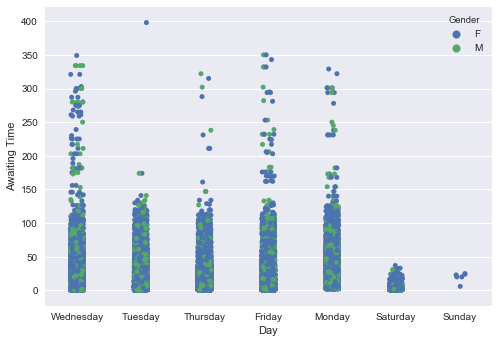

In [10]:
sns.stripplot(x ='DayOfTheWeek', y = 'AwaitingTime', data = ncns, hue = 'Gender', jitter = True)
plt.xlabel('Day')
plt.ylabel('Awaiting Time')
sns.plt.show()

#### The distribution seems ok but seems we have a few outliers which can skew our results later on. Lets remove them.

In [11]:
ncns = ncns[ncns.AwaitingTime < 350]

#### Lets find probability of not showing up due to various factors

#### The following probability method will return the probability of patients not showing up according to the features.

In [12]:
def probability(feature):
    df = pd.crosstab(index = ncns[feature], columns = ncns.Status).reset_index()
    df['probability'] = df['No-Show'] / (df['Show-Up'] + df['No-Show']) #probability of not showing up
    return df[[feature, 'probability']]

#### Lets plot linear models and check for probabilities of no-shows corresponding to the features

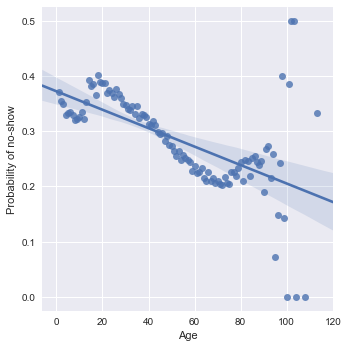

In [13]:
sns.lmplot(x = 'Age', y = 'probability', data = probability('Age'))
plt.xlabel('Age')
plt.ylabel('Probability of no-show')
plt.show()

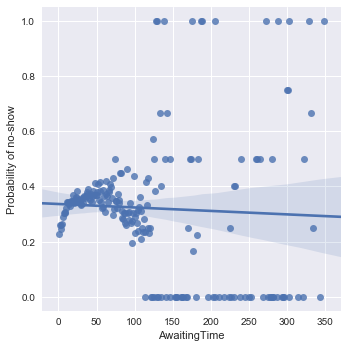

In [14]:
sns.lmplot(x = 'AwaitingTime', y = 'probability', data = probability('AwaitingTime'))
plt.xlabel('AwaitingTime')
plt.ylabel('Probability of no-show')
plt.show()

#### Most of the points don't lie in the confidence zone of lmplot! Lets check for other features

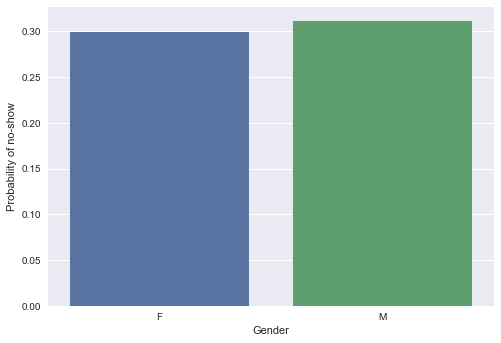

In [15]:
sns.barplot(x = 'Gender', y = 'probability', data = probability('Gender'))
plt.xlabel('Gender')
plt.ylabel('Probability of no-show')
plt.show()

#### The nearly equally probability implies that there is not much variance in the result on the basis of Gender

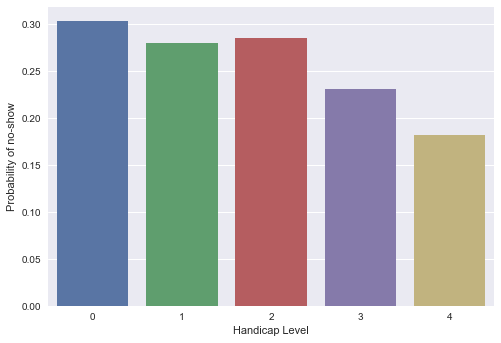

In [16]:
sns.barplot(x = 'Handicap', y = 'probability',  data = probability('Handicap'))
plt.xlabel('Handicap Level')
plt.ylabel('Probability of no-show')
plt.show()

#### Seems handicap level 0,1,2 are more probable not to show up!

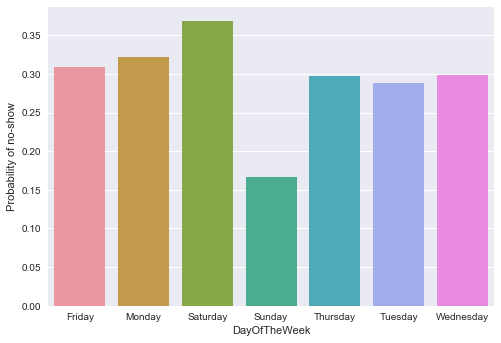

In [17]:
sns.barplot(x = 'DayOfTheWeek', y = 'probability',  data = probability('DayOfTheWeek'))
plt.xlabel('DayOfTheWeek')
plt.ylabel('Probability of no-show')
plt.show()

#### People with appointments on Saturdays generally tend not to show up. No one likes to start the weekend at the hospital after all!

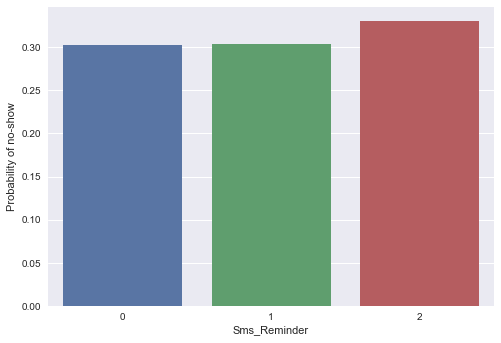

In [18]:
sns.barplot(x = 'Sms_Reminder', y = 'probability',  data = probability('Sms_Reminder'))
plt.xlabel('Sms_Reminder')
plt.ylabel('Probability of no-show')
plt.show()

#### SMS reminders aren't the factor affecting the appointments after all!

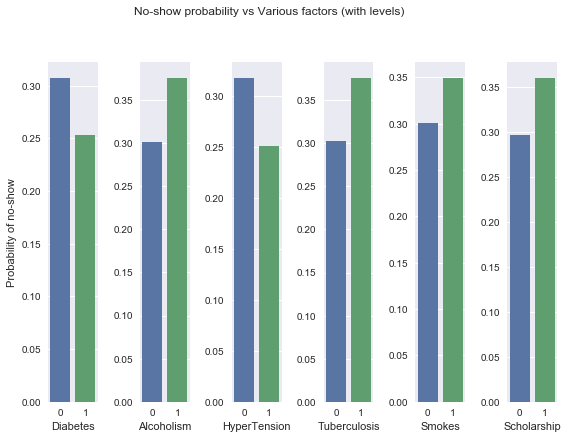

In [19]:
plt.subplot(1,6,1)
sns.barplot(x = 'Diabetes', y = 'probability',  data = probability('Diabetes'))
plt.xlabel('Diabetes')
plt.ylabel('Probability of no-show')

plt.subplot(1,6,2)
sns.barplot(x = 'Alcoholism', y = 'probability',  data = probability('Alcoholism'))
plt.xlabel('Alcoholism')
plt.ylabel('')

plt.subplot(1,6,3)
sns.barplot(x = 'HyperTension', y = 'probability',  data = probability('HyperTension'))
plt.xlabel('HyperTension')
plt.ylabel('')
plt.text(1, 0.38, 'No-show probability vs Various factors (with levels)',
         horizontalalignment='center',
         fontsize=12)

plt.subplot(1,6,4)
sns.barplot(x = 'Tuberculosis', y = 'probability',  data = probability('Tuberculosis'))
plt.xlabel('Tuberculosis')
plt.ylabel('')

plt.subplot(1,6,5)
sns.barplot(x = 'Smokes', y = 'probability',  data = probability('Smokes'))
plt.xlabel('Smokes')
plt.ylabel('')

plt.subplot(1,6,6)
sns.barplot(x = 'Scholarship', y = 'probability',  data = probability('Scholarship'))
plt.xlabel('Scholarship')
plt.ylabel('')

plt.tight_layout()

plt.show()

#### A non-diabetic who drink, smokes, has TB and is a scholar but hasn't got HyperTension would more likely not show up! Hard combination yet true by the statistics!

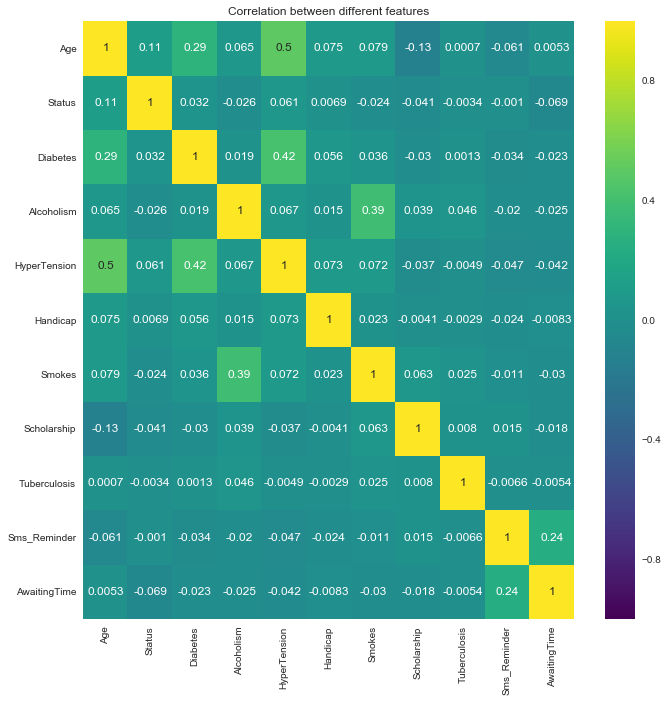

In [20]:
ncns.Status = ncns.Status.apply(lambda x: 1 if x == 'Show-Up' else 0)
corrMat = ncns.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corrMat, cmap = 'viridis', annot=True)
plt.title('Correlation between different features')
plt.show()

In [21]:
ncns.dtypes

Age                           int64
Gender                     category
AppointmentRegistration      object
AppointmentData              object
DayOfTheWeek                 object
Status                        int64
Diabetes                      int64
Alcoholism                    int64
HyperTension                  int64
Handicap                      int64
Smokes                        int64
Scholarship                   int64
Tuberculosis                  int64
Sms_Reminder                  int64
AwaitingTime                  int64
dtype: object

#### The correlation heat map shows that Status has not got much correlation with the features provided.

#### Lets predict now based on few ML techniques but without considering the facts we just found out! (Reducing the data on basis of specific features led to decrease of the data by a large amount and didn't lead to any change in accuracy also.)

In [22]:
import sklearn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### Lets give numerical values to our features.

In [23]:
def dayNumber(day):
    if day == 'Monday': 
        return 0
    if day == 'Tuesday': 
        return 1
    if day == 'Wednesday': 
        return 2
    if day == 'Thursday': 
        return 3
    if day == 'Friday': 
        return 4
    if day == 'Saturday': 
        return 5
    if day == 'Sunday': 
        return 6

ncns.DayOfTheWeek = ncns.DayOfTheWeek.apply(dayNumber)
ncns.Gender = ncns.Gender.apply(lambda x: 1 if x == 'M' else 0)

In [24]:
ncns.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,0,1,6


#### Reserving 30% data for test

In [25]:
def trainTest():
    train, test = train_test_split(ncns, train_size = 0.7) 
    train_status = train.Status
    train = train[['Gender', 'DayOfTheWeek', 'Diabetes', 'Alcoholism', 'HyperTension', \
               'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis']]
    test_status = test.Status
    test = test[['Gender', 'DayOfTheWeek', 'Diabetes', 'Alcoholism', 'HyperTension', \
               'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis']]
    return train, train_status, test, test_status

#### Random Forest Classifier

In [26]:
train, train_status, test, test_status = trainTest()
rf = ensemble.RandomForestClassifier()
rf.fit(train.values, train_status.values)

predicted = rf.predict(test.values)
print(accuracy_score(test_status.values, predicted))

0.69753739931


#### The result isn't too good, lets check the important features in the data using extra trees classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(train, train_status)
print(etc.feature_importances_)

[ 0.03860449  0.21481069  0.05105973  0.06542257  0.3354672   0.07373166
  0.05509455  0.15553339  0.01027572]


#### Days of the week, Hypertension and Scholarship have more importance than others. Lets consider them and calculate the score once again.

In [28]:
train = train[['DayOfTheWeek', 'HyperTension', 'Scholarship']]
test = test[['DayOfTheWeek', 'HyperTension', 'Scholarship']]

rf.fit(train.values, train_status.values)

predicted = rf.predict(test.values)
print(accuracy_score(test_status.values, predicted))

0.698285385501


#### Not much of an improvement. Lets see if other models perform well

#### Multinomial Naive Bayes

In [29]:
train, train_status, test, test_status = trainTest()
mnb = MultinomialNB().fit(train, train_status)
predicted = mnb.predict(test)
print(accuracy_score(test_status, predicted))

0.697744533947


#### Still the same result, lets select some features using SelectKBest method and see if our accuracy improves

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kBest = SelectKBest(score_func=chi2, k=4)
fit = kBest.fit(train, train_status)
print(fit.scores_)
print(sorted(fit.scores_ ,reverse = True))

[  1.82915261e+01   4.93725954e-01   1.67351580e+02   1.24277330e+02
   5.58928075e+02   1.14284513e+01   1.07602585e+02   2.93853479e+02
   2.14578296e+00]
[558.92807545853429, 293.85347906292736, 167.35158032586116, 124.27732993186692, 107.60258549224196, 18.291526078617636, 11.428451255322219, 2.1457829593978164, 0.49372595417035325]


#### Hypertension, Scholarship, Diabetes, Alcoholism and Smoking are some of the important features with scores > 100. Lets try to model on only these features

In [31]:
train = train[['HyperTension', 'Scholarship', 'Diabetes', 'Alcoholism', 'Smokes']]
test = test[['HyperTension', 'Scholarship', 'Diabetes', 'Alcoholism', 'Smokes']]

#### Lets run our model again on MultinomialNB but this time lets use cross validation to see if it helps

In [32]:
from sklearn.model_selection import cross_val_score
mnb = MultinomialNB().fit(train, train_status)
scores = cross_val_score(mnb, test, test_status, cv=5)
scores.mean()

0.69795166686027366

#### No it didn't help. Lets check our data using some other models.
#### Logistic regression

In [33]:
train, train_status, test, test_status = trainTest()
log_reg = LogisticRegression()
log_reg.fit(train, train_status)

predicted = log_reg.predict(test)
print(accuracy_score(test_status, predicted))

0.697779056387


#### Still the same. Lets see if gradient descent can improve the results!

In [34]:
sgd = SGDClassifier()
sgd.fit(train, train_status)
predicted = sgd.predict(test)
print(accuracy_score(test_status, predicted))

0.697779056387


#### All the techniques give around 70% as the accuracy. Lets see if KNN can help us.

In [35]:
knn = KNeighborsClassifier()
knn.fit(train, train_status)
predicted = knn.predict(test)
print(accuracy_score(test_status, predicted))

0.632393555811


#### Oh boy. The accuracy decreased. Hmm. Though scaling isn't required, lets check if scaling can lead to better results in KNN.

In [36]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
train_std = stdsc.fit_transform(train)
test_std = stdsc.transform(test)

knn.fit(train_std, train_status)
predicted = knn.predict(test_std)
print(accuracy_score(test_status, predicted))

0.682209436133


#### There was some increase but still it failed in comparison to other models. Accuracy across various techniques is nearly same. What if we need to check the way we are measuring our accuracy of the model? Lets find out.
##### http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [37]:
from sklearn import metrics
print(metrics.f1_score(test_status, predicted))

0.808713721687


#### Interesting! Lets change the parameters of f-score and see if our model gives better accuracy

In [38]:
print(metrics.f1_score(test_status, predicted, average='macro'))
print(metrics.f1_score(test_status, predicted, average='micro'))
print(metrics.f1_score(test_status, predicted, average='weighted'))

0.43517575313
0.682209436133
0.582931727022


#### Nopes! 'average = None' for the f-score gives us the best results. 
#### Lets try another metric, the precision score!

In [39]:
print(metrics.precision_score(test_status, predicted))

0.69718032317


#### Damn! We are back to where we were. Haha!!
### Being new into DataScience, I was experimenting with various things I am learning now. Hope to improve this model soon. This analysis taught a lot of important things. Its vital that features that are more important need to be selected in the model apart from selected the model. Also important is the metrics used to measure the accuracy. 
#### On a lighter note, some good lessons learnt after 2 days of much more activities done than the ones finally submitting online in the ipython notebook. Finally this tired body can rest! 
### Still Data beats Emotions :D ;)